**Yêu cầu cài đặt thư viện:** <br>
Thư viện Vnquant hữu ích trong việc crawl dữ liệu chứng khoán và vẽ biểu đồ nến OHLC
- Cài đặt thư viện Vnquant <br>
git clone https://github.com/phamdinhkhanh/vnquant <br>
cd vnquant <br>
python setup.py install <br>
- Cài đặt thư viện BeautifulSoup4 theo yêu cầu của Vnquant<br>
pip install beautifulsoup4

In [ ]:
!git clone https://github.com/phamdinhkhanh/vnquant

Cloning into 'vnquant'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 145 (delta 31), reused 42 (delta 14), pack-reused 82
Receiving objects: 100% (145/145), 1.16 MiB | 13.82 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
%cd /content/vnquant
!python setup.py install
!pip install beautifulsoup4

/content/vnquant
running install
running bdist_egg
running egg_info
writing vnquant.egg-info/PKG-INFO
writing dependency_links to vnquant.egg-info/dependency_links.txt
writing requirements to vnquant.egg-info/requires.txt
writing top-level names to vnquant.egg-info/top_level.txt
writing manifest file 'vnquant.egg-info/SOURCES.txt'
writing manifest file 'vnquant.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying vnquant/Plot.py -> build/lib/vnquant
copying vnquant/DataLoader.py -> build/lib/vnquant
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/vnquant
copying build/lib/vnquant/Plot.py -> build/bdist.linux-x86_64/egg/vnquant
copying build/lib/vnquant/__init__.py -> build/bdist.linux-x86_64/egg/vnquant
copying build/lib/vnquant/DataLoader.py -> build/bdist.linux-x86_64/egg/vnquant
copying build/lib/vnquant/utils.py -> build/bdist.linux-x86_64/egg/vnquant


In [ ]:
from vnquant import DataLoader
from vnquant import Plot
import pandas as pd
import numpy as np
from scipy import stats
import datetime
import matplotlib.pyplot as plt

## Danh mục đầu tư
Danh mục đầu tư của một nhà đầu tư về cơ bản được hiểu là khoản đầu tư vào các loại tài sản (trái phiếu, cổ phiếu, ...) khác nhau từ các công ty khác nhau. <br>
Ví dụ: Bạn có khoản đầu tư vào cổ phiếu của 3 công ty Ngân hàng BIDV(BID), Tập đoàn Bảo Việt(BVH), Nhà máy Hòa Phát(HPG) thì 3 mã cổ phiếu này sẽ tạo thành một danh mục đầu tư của bạn.

## Tối ưu hóa danh mục đầu tư

Tối ưu hóa danh mục đầu tư là quá trình tạo ra một danh mục đầu tư có lợi tức tối đa và rủi ro tối thiểu

## Các loại tài sản, lợi nhuận và rủi ro

Tài sản đầu tư có nhiều loại, ví dụ như: <br>
1. Trái phiếu
2. Cổ phiếu
3. Vàng
4. Dầu
5. Địa ốc

...

Khoản lợi nhuận thu được từ tài sản đến từ việc giao dịch chênh lệch giá giữa các thời điểm khác nhau. Ví dụ, bạn mua 100 mã cổ phiếu AAA tại ngày 10/05/2021 với giá 90 ngàn đồng và bán với giá 120 ngàn đồng tại ngày 13/05/2021 thì khoản lợi nhuận thu được là (120 - 90)*100 ngàn đồng (Chưa tính các khoản phí khác). Tuy nhiên, giá cổ phiếu không phải lúc nào cũng tăng mà sẽ có lúc sụt giảm -> đây được gọi là rủi ro đầu tư. <br>
Vì vậy nên khi bạn xây dựng một danh mục đầu tư, bạn nên đa dạng hóa tài sản của mình theo ngành nghề, khu vực,.. hoặc mua các loại sản phẩm khác nhau từ các công ty khác nhau. <br>
Giả định bạn đầu tư vào danh mục gồm 4 mã chứng khoán:    <br>

In [ ]:
# Khởi tạo danh mục đầu tư và lựa chọn khoảng thời gian bắt đầu
tickers = ['BVH', 'NVL', 'VCB', 'FPT', 'SSI']
start = '2017-11-01'
end = str(datetime.date.today())
loader = DataLoader.DataLoader(tickers, start, end, minimal=True)
df = loader.download()['close']
df.dropna(inplace=True)
df.head()

2021-07-06 13:58:24,006 : INFO : NumExpr defaulting to 2 threads.
/content/vnquant/vnquant/DataLoader.py:251: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

2021-07-06 13:59:00,337 : INFO : data BVH from 2017-11-01 to 2021-07-06 have already cloned!
/content/vnquant/vnquant/DataLoader.py:251: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

2021-07-06 13:59:35,146 : INFO : data NVL from 2017-11-01 to 2021-07-06 have already cloned!
/content/vnquant/vnquant/DataLoader.py:251: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

2021-07-06 14:00:10,701 : INFO : data VCB from 2017-11-01 to 2021-07-06 have already cloned!
/content/vnquant/vnquant/DataLoader.py:251: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

2021-07-06 14:00:46,664 : INFO : data FPT from 2017-11-01 to 2021-07-06 have already cloned!
/content/vnquant/vnqua

Symbols,BVH,NVL,VCB,FPT,SSI
date,,,,,
2017-11-01,50.6,60.8,41.60,50.8,22.20
2017-11-02,49.5,61.8,41.10,50.5,22.55
2017-11-03,50.4,61.5,41.90,51.0,22.80
2017-11-06,51.1,61.4,42.50,51.4,23.10
2017-11-07,51.3,61.2,42.45,51.2,23.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 915 entries, 2017-11-01 to 2021-07-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BVH     915 non-null    float64
 1   NVL     915 non-null    float64
 2   VCB     915 non-null    float64
 3   FPT     915 non-null    float64
 4   SSI     915 non-null    float64
dtypes: float64(5)
memory usage: 42.9 KB


In [ ]:
df.describe()

Symbols,BVH,NVL,VCB,FPT,SSI
count,915.000000,915.000000,915.000000,915.000000,915.000000
mean,70.813661,66.517923,75.100820,54.386667,26.106011
std,17.591206,17.059127,16.292604,11.703961,8.459509
min,32.300000,50.000000,41.100000,38.800000,11.500000
25%,55.800000,57.200000,61.150000,45.875000,18.675000
50%,71.000000,61.900000,74.500000,51.300000,26.050000
75%,86.000000,67.900000,87.300000,58.200000,31.600000
max,107.900000,142.000000,116.400000,97.900000,57.900000


In [ ]:
# Biểu đồ nên lịch sử giá cổ phiếu FPT
Plot._vnquant_candle_stick(data='FPT',
                    title='FPT stock price data and volume',
                    xlab='Date', ylab='Price',
                    start_date=start,
                    end_date=end,
                    show_vol=True)

2021-07-06 14:01:41,946 : INFO : data FPT from 2017-11-01 to 2021-07-06 have already cloned!


## Thay đổi giá


In [ ]:
df.pct_change()

Symbols,BVH,NVL,VCB,FPT,SSI
date,,,,,
2017-11-01,NaN,NaN,NaN,NaN,NaN
2017-11-02,-0.021739,0.016447,-0.012019,-0.005906,0.015766
2017-11-03,0.018182,-0.004854,0.019465,0.009901,0.011086
2017-11-06,0.013889,-0.001626,0.014320,0.007843,0.013158
2017-11-07,0.003914,-0.003257,-0.001176,-0.003891,-0.004329
...,...,...,...,...,...
2021-06-30,-0.011844,0.000000,0.021053,-0.006772,0.007326
2021-07-01,0.010274,-0.008264,0.000000,0.010227,0.045455
2021-07-02,0.001695,-0.008333,-0.012887,0.033746,0.006957


In [ ]:
exp_return = df.pct_change().apply(lambda x: np.log(1+x))
exp_return.head()

Symbols,BVH,NVL,VCB,FPT,SSI
date,,,,,
2017-11-01,NaN,NaN,NaN,NaN,NaN
2017-11-02,-0.021979,0.016314,-0.012092,-0.005923,0.015643
2017-11-03,0.018019,-0.004866,0.019278,0.009852,0.011025
2017-11-06,0.013793,-0.001627,0.014218,0.007813,0.013072
2017-11-07,0.003906,-0.003263,-0.001177,-0.003899,-0.004338


## Yearly return
Lợi nhuận kỳ vọng= trung bình biến đổi giá cổ phiếu


In [ ]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er


Symbols
BVH   -0.014301
NVL    0.198734
VCB    0.225160
FPT    0.151594
SSI    0.256391
dtype: float64

## Xây dựng danh mục đầu tư với mức rủi ro tối ưu
Bây giờ chúng ta sẽ xây dựng một danh mục tối ưu bằng cách phân bổ tỷ trọng đầu tư vào từng mã cổ phiếu có trong danh mục đầu tư. Sau đó chúng ta sẽ tính lợi nhuận kỳ vọng, phương sai danh mục đầu tư tối thiểu, đường Efficient Frontier.

In [ ]:
# Tính ma trận hiệp phương sai
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,BVH,NVL,VCB,FPT,SSI
Symbols,,,,,
BVH,0.000616,0.000083,0.000244,0.000204,0.000309
NVL,0.000083,0.000394,0.000073,0.000036,0.000060
VCB,0.000244,0.000073,0.000405,0.000190,0.000291
FPT,0.000204,0.000036,0.000190,0.000401,0.000279
SSI,0.000309,0.000060,0.000291,0.000279,0.000645


In [ ]:
# Độ biến động - độ lệch chuẩn của từng mã cổ phiếu:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
BVH    0.392527
NVL    0.313857
VCB    0.318347
FPT    0.316611
SSI    0.401426
dtype: float64



Sử dụng **phương pháp Monte Carlo** mô phỏng số lượng lớn danh mục đầu tư với phân phối tỷ trọng đầu tư cho các mã cổ phiếu khác nhau, tổng tỷ trọng = 1

In [ ]:
pf_return = []
pf_std = []
pf_weights = []

num_assets = len(df.columns)
num_portfolios = 10000


for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    pf_weights.append(weights)
    returns = np.dot(weights, ind_er)
    pf_return.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # mul - multiply dataframe -> pf variance 
    std = np.sqrt(var)
    pf_std.append(std)

In [ ]:
data = {'Returns':pf_return, 'Standard_Deviation':pf_std}

for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in pf_weights]
    
portfolios  = pd.DataFrame(data)
portfolios

,Returns,Standard_Deviation,BVH weight,NVL weight,VCB weight,FPT weight,SSI weight
0,0.137468,0.014976,0.279651,0.336698,0.043942,0.214111,0.125598
1,0.163035,0.015421,0.232308,0.311080,0.154360,0.073620,0.228633
2,0.118785,0.015310,0.350213,0.454542,0.019184,0.152670,0.023391
3,0.207500,0.016622,0.015201,0.125455,0.256534,0.281793,0.321017
4,0.128451,0.018784,0.355047,0.016674,0.017018,0.289498,0.321763
...,...,...,...,...,...,...,...
9995,0.202061,0.015702,0.074491,0.314876,0.148120,0.108638,0.353875
9996,0.161315,0.014182,0.168397,0.378493,0.165893,0.214589,0.072628
9997,0.138251,0.016342,0.317194,0.235555,0.009917,0.175454,0.261880
9998,0.116213,0.016518,0.404672,0.163568,0.282392,0.118195,0.031173


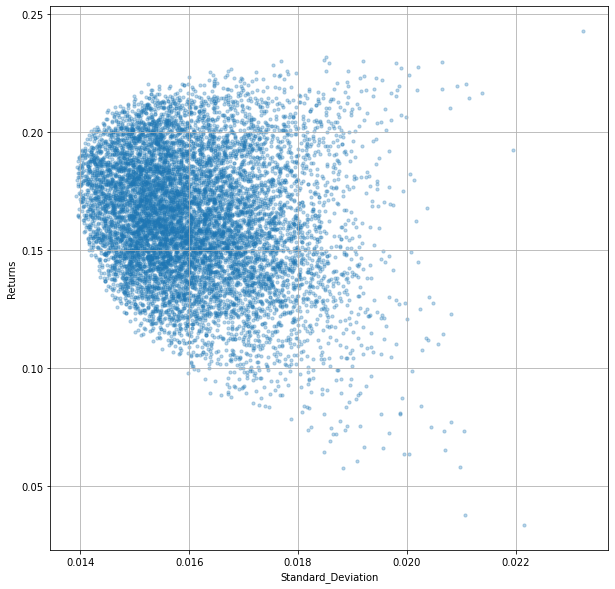

In [ ]:
# Plot result
portfolios.plot.scatter(x='Standard_Deviation', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

Mỗi điểm nằm trên biên ngoài đám mây danh mục đầu tư đại diện cho một danh mục tối ưu cho bất kỳ mức rủi ro nhất định nào. Các điểm nằm trong là những danh mục đầu tư không tối ưu. <br>
Trong đám mây trên, ta có thể xác định được danh mục đầu tư có mức biến động thấp nhất (mức rủi ro thấp nhất)

## Efficient Frontier
Mọi tài sản trong một dnah mục đầu tư đều có tỷ lệ lợi nhuận và rủi ro riêng. Vì vậy, chúng ta có thể tạo ra tập hợp nhiều loại danh mục đầu tư với mức lợi nhuận, rủi ro khác nhau bằng cách phân bổ tỷ trọng đầu tư cho mỗi tài sản theo những cách khác nhau. <br>

**Efficient Frontier**- Đường biên hiệu quả là đường biểu diễn tập hợp các danh mục đầu tư tối ưu mang lại lợi nhuận kỳ vọng cao nhất cho một mức rủi ro nhất định hoặc mức rủi ro thất nhất cho mức lợi nhuận dự kiến nhất định. <br>

<img align="center" src="imags/efficient-frontier-1572866074478745852989.jpg" alt="Drawing" style="width: 600px;"/>


In [ ]:
min_vol_port = portfolios.iloc[portfolios['Standard_Deviation'].idxmin()]                              
min_vol_port

Returns               0.172993
Standard_Deviation    0.013915
BVH weight            0.091276
NVL weight            0.396631
VCB weight            0.209875
FPT weight            0.279272
SSI weight            0.022946
Name: 2223, dtype: float64

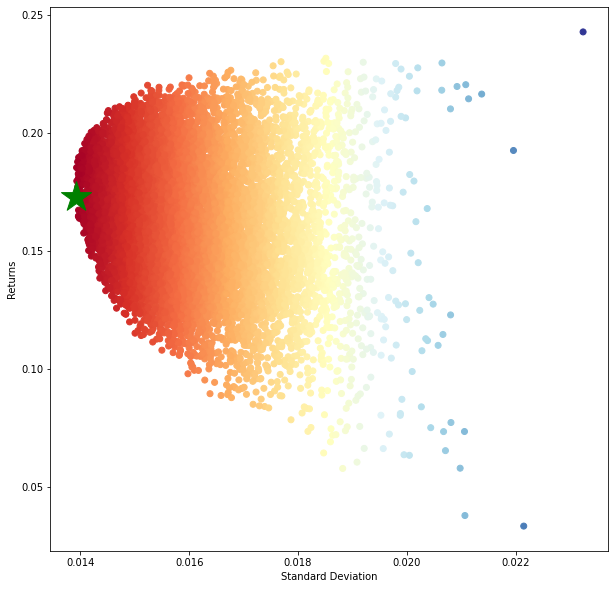

In [ ]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Standard_Deviation'], portfolios['Returns'],c=portfolios['Standard_Deviation'],cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.scatter(min_vol_port[1], min_vol_port[0], color='g', marker='*', s=1000)
plt.show()

## Lựa chọn danh mục tối ưu dựa vào Sharpe ratio

Chúng ta có thể thấy danh mục tại điểm có dấu sao đỏ có mức biến động (stantdar deviation) thấp nhất nhưng lợi nhuận của danh mục đầu tư này lại rất thấp. Nhưng bất kỳ nhà đầu tư nào cũng đều muốn tối đa hóa lợi nhuận của mình, ngay cả khi có rủi ro. <br>
Vì vậy tôi đưa thêm chỉ số Sharpe ratio: là một thước đo xem lợi nhuận thu được là bao nhiêu trên một đơn vị rủi ro khi đầu tư vào một tài sản hau đầu tư theo một chiến lược kinh doanh. <br>
Tỉ lệ Sharpe được phát triển bởi William F. Sharpe và được sử dụng để giúp các nhà đầu tư hiểu được lợi tức của khoản đầu tư so với rủi ro của nó. Tỉ lệ này là lợi nhuận trung bình kiếm được vượt quá lợi nhuận phi rủi ro trên mỗi đơn vị rủi ro. <br>

**Công thức tính:** <br>
<img align="center" src="imags/SharpeRatio.png" alt="Drawing" style="width: 600px;"/>

Một danh mục đầu tư tối ưu có thể được coi là danh mục có Sharpe Ratio cao nhất <br>
<strong><em>(risk free rate là lãi suất phi rủi ro)</em></strong>


In [ ]:
risk_free = 0.1 # rủi ro thị trường là 10%
portfolios['Sharpe_ratio'] = ((portfolios['Returns'] - risk_free)/portfolios['Standard_Deviation'])
portfolios

,Returns,Standard_Deviation,BVH weight,NVL weight,VCB weight,FPT weight,SSI weight,Sharpe_ratio
0,0.137468,0.014976,0.279651,0.336698,0.043942,0.214111,0.125598,2.501833
1,0.163035,0.015421,0.232308,0.311080,0.154360,0.073620,0.228633,4.087697
2,0.118785,0.015310,0.350213,0.454542,0.019184,0.152670,0.023391,1.226995
3,0.207500,0.016622,0.015201,0.125455,0.256534,0.281793,0.321017,6.467201
4,0.128451,0.018784,0.355047,0.016674,0.017018,0.289498,0.321763,1.514614
...,...,...,...,...,...,...,...,...
9995,0.202061,0.015702,0.074491,0.314876,0.148120,0.108638,0.353875,6.499687
9996,0.161315,0.014182,0.168397,0.378493,0.165893,0.214589,0.072628,4.323485
9997,0.138251,0.016342,0.317194,0.235555,0.009917,0.175454,0.261880,2.340609
9998,0.116213,0.016518,0.404672,0.163568,0.282392,0.118195,0.031173,0.981501


In [ ]:
optimal_port = portfolios.iloc[portfolios['Sharpe_ratio'].idxmax()]    
optimal_port

Returns               0.220333
Standard_Deviation    0.015235
BVH weight            0.001939
NVL weight            0.433667
VCB weight            0.331433
FPT weight            0.001701
SSI weight            0.231260
Sharpe_ratio          7.898594
Name: 9655, dtype: float64

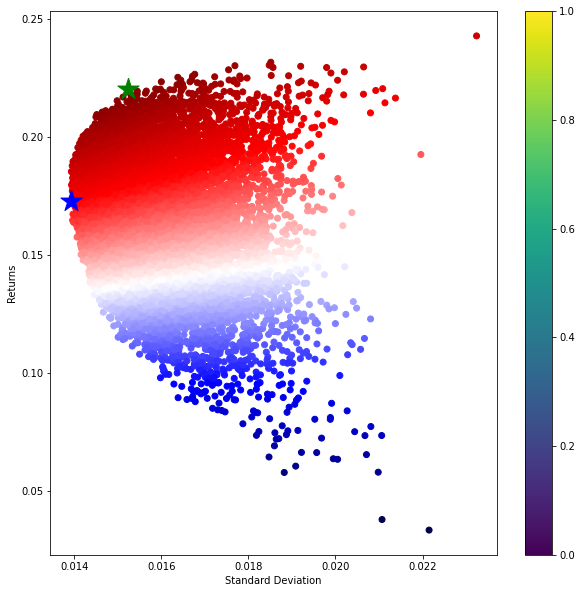

In [ ]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Standard_Deviation'], portfolios['Returns'],c=portfolios['Sharpe_ratio'],cmap='seismic')
plt.scatter(min_vol_port[1], min_vol_port[0], color='b', marker='*', s=500)
plt.scatter(optimal_port[1], optimal_port[0], color='g', marker='*', s=500)
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
plt.show()

Như vậy, danh mục đầu tư tối ưu nằm các khá xa so với danh mục đầu tư có độ lệch chuẩn thấp nhất. <br>
Tuy nhiên, việc lựa chọn danh mục đầu tư như thế nào vẫn phụ thuộc nhiều vào người xây dựng danh mục đầu tư. Phương pháp tối ưu danh mục đầu tư này chỉ mang tính chất tham khảo, không mang tính khuyến khích.